<a href="https://colab.research.google.com/github/varshum12/Deep-Learning-23sep-2025-weekday/blob/main/multclass_classification_30_sept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as  plt
import numpy as np

In [3]:
df = pd.read_csv('train_weather.csv')

In [4]:
# basic  checks

In [5]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [6]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [7]:
# rename columns
df.rename(columns  =  {'Precipitation (%)' : 'Precipitation' ,
                       'Visibility (km)' : 'Visibility'} ,inplace  = True )

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation         13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility            13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation,0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility,0
Location,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
# seperate x and  y

In [12]:
x  = df.drop('Weather Type' , axis = 1 )
y  =  df['Weather Type']

In [13]:
x.head()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility,Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [14]:
y.head()

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy


In [15]:
y1 = pd.get_dummies(y  , dtype= 'int')

In [16]:
y1

,Cloudy,Rainy,Snowy,Sunny
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
13195,0,1,0,0
13196,0,0,1,0
13197,1,0,0,0
13198,0,0,1,0


In [17]:
# seperate cat and  num  data
cat  =  x.columns[x.dtypes  == 'object']
num  =   x.columns[x.dtypes  != 'object']

In [18]:
print(cat)
print()
print(num)

Index(['Cloud Cover', 'Season', 'Location'], dtype='object')

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Atmospheric Pressure', 'UV Index', 'Visibility'],
      dtype='object')


In [19]:
df.Location.value_counts()

,count
Location,
inland,4816
mountain,4813
coastal,3571


In [20]:
#  create  pipeline
from sklearn.pipeline  import Pipeline
from  sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.impute  import SimpleImputer

In [21]:
num_pipeline  = Pipeline(steps  = [('imputer' ,  SimpleImputer(strategy  = 'mean') ) ,
                                   ('scaler'  , StandardScaler() )])

cat_pipeline  = Pipeline(steps  = [('imputer' ,  SimpleImputer(strategy  = 'most_frequent') )    ,
                                   ('encoder' ,  OneHotEncoder(handle_unknown= 'ignore' , sparse_output= True ))])

In [22]:
#  combine pipeline
pre  =  ColumnTransformer([('num' ,  num_pipeline  ,  num) ,
                           ('cat' , cat_pipeline  , cat)])

In [23]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Atmospheric Pressure', 'UV Index', 'Visibility'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Cloud Cover', 'Season', 'Location'], dtype='object'))])

In [24]:
#  transform data
x_scaled  =  pre.fit_transform(x)

In [25]:
x_scaled

array([[-0.29493119,  0.21240351, -0.04808565, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.14303484,  1.35138482, -0.19283608, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.62536707, -0.23328483, -0.40996172, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.62536707,  0.41048722, -0.62708737, ...,  1.        ,
         0.        ,  0.        ],
       [-0.92763624,  0.36096629,  0.02428956, ...,  0.        ,
         1.        ,  0.        ],
       [-1.38778537, -1.52082893, -1.42321472, ...,  0.        ,
         0.        ,  1.        ]])

In [26]:
#  dataframe
x_scaled  =  pd.DataFrame(x_scaled ,
                          columns  =  pre.get_feature_names_out())

In [27]:
x_scaled.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation,num__Atmospheric Pressure,num__UV Index,num__Visibility,cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [28]:
# train test  split
from sklearn.model_selection import train_test_split
x_train  , x_test  ,  y_train  , y_test  =  train_test_split(x_scaled  ,  y1  ,
                                                             random_state  =  2  ,
                                                             test_size  = 0.2 )

In [29]:
x_train.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation,num__Atmospheric Pressure,num__UV Index,num__Visibility,cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
7646,-1.675379,-1.768434,0.675666,-1.115794,0.067264,-0.779410,3.718690,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4915,3.788892,1.896115,-0.554712,1.294574,0.486908,2.332257,-0.582231,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5297,0.682886,0.559050,0.241415,0.073739,0.186625,-1.038715,-1.175461,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2397,0.855442,0.261924,-0.627087,-0.364510,0.290662,-0.520104,0.455922,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11628,-1.560341,1.103780,0.386166,0.449380,-0.671482,-0.779410,-0.433923,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [30]:
x_test.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation,num__Atmospheric Pressure,num__UV Index,num__Visibility,cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
4838,-1.272748,0.707613,0.458541,0.731112,-0.484645,-0.779410,-1.323769,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8623,2.350926,1.400906,-0.192836,0.856326,0.628851,2.591563,-0.285616,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7040,2.005814,1.995157,0.530916,0.918933,-0.211513,1.554340,-1.027154,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8881,-1.100192,1.301864,1.182293,0.574594,-0.272269,-1.038715,-0.730539,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12020,-0.064857,-0.579931,-0.844213,-0.614938,0.351687,-0.779410,0.455922,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [31]:
y_train.head()

,Cloudy,Rainy,Snowy,Sunny
7646,0,0,1,0
4915,0,0,0,1
5297,0,1,0,0
2397,1,0,0,0
11628,0,0,1,0


In [32]:
y_test.head()

,Cloudy,Rainy,Snowy,Sunny
4838,0,0,1,0
8623,0,0,0,1
7040,0,1,0,0
8881,0,0,1,0
12020,1,0,0,0


In [33]:
print(x_train.shape  ,  y_train.shape)
print(x_test.shape  ,  y_test.shape)

(10560, 18) (10560, 4)
(2640, 18) (2640, 4)


In [34]:
#  create  architecture
from  keras.models import Sequential
from keras.layers  import Dense  ,  BatchNormalization , Activation ,Dropout

In [35]:
y.unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [36]:
nn  =  Sequential()

nn.add(Dense(units  = 50  , input_dim  =  x_train.shape[1]  ,
                        kernel_initializer= 'he_uniform' ))
nn.add(Dropout(0.2))

## add hidden  layer
nn.add(Dense(500 , kernel_initializer='he_uniform'))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.3))

nn.add(Dense(400 , kernel_initializer='he_uniform'))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.4))

nn.add(Dense(500 , kernel_initializer='he_uniform'))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.5))

## add  output layer
nn.add(Dense(units = 4 ,  activation  =  'softmax'))

In [37]:
# compile
nn.compile(optimizer  = 'adam' , loss  =  'categorical_crossentropy' , metrics =  ['accuracy'])

In [38]:
# model  fitting
from keras.callbacks import EarlyStopping
es  =  EarlyStopping(monitor  =  'val_loss' ,
                     patience  = 5 ,
                     restore_best_weights=True)

In [39]:
hist  =  nn.fit(x = x_train  ,
                y=  y_train ,
                epochs  =  100  ,
                callbacks  =   es,
                validation_split= 0.2)

Epoch 1/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7214 - loss: 0.8207 - val_accuracy: 0.8783 - val_loss: 0.3339
Epoch 2/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8427 - loss: 0.4388 - val_accuracy: 0.8897 - val_loss: 0.2802
Epoch 3/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8564 - loss: 0.3920 - val_accuracy: 0.8873 - val_loss: 0.2733
Epoch 4/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8589 - loss: 0.3501 - val_accuracy: 0.8906 - val_loss: 0.2639
Epoch 5/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8708 - loss: 0.3281 - val_accuracy: 0.8954 - val_loss: 0.2443
Epoch 6/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8779 - loss: 0.3089 - val_accuracy: 0.8973 - val_loss: 0.2458
Epoch 7/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8851 - loss: 0.2913 - val_accuracy: 0.8949 - val_loss: 0.2362
Epoch 8/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8790 - loss: 0.2929 - val_accu

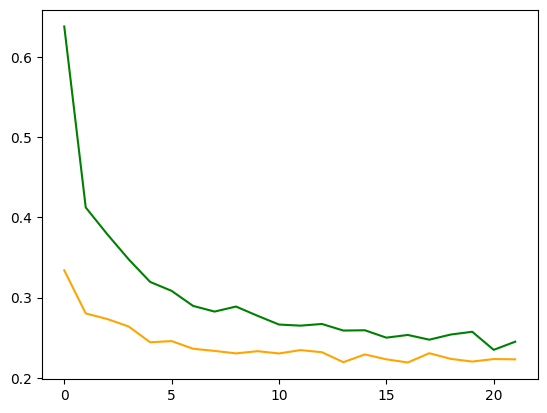

In [40]:
plt.plot(hist.history['loss'] , c= 'green')
plt.plot(hist.history['val_loss'] , c= 'orange')

In [41]:
nn.evaluate(x_train  ,  y_train)

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9236 - loss: 0.1739


[0.18329474329948425, 0.9176136255264282]

In [42]:
nn.evaluate(x_test  ,  y_test)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9040 - loss: 0.2128


[0.22199124097824097, 0.8988636136054993]

In [44]:
y

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy
...,...
13195,Rainy
13196,Snowy
13197,Cloudy
13198,Snowy


In [45]:
y1

,Cloudy,Rainy,Snowy,Sunny
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
13195,0,1,0,0
13196,0,0,1,0
13197,1,0,0,0
13198,0,0,1,0


In [46]:
y_train

,Cloudy,Rainy,Snowy,Sunny
7646,0,0,1,0
4915,0,0,0,1
5297,0,1,0,0
2397,1,0,0,0
11628,0,0,1,0
...,...,...,...,...
2514,0,1,0,0
11798,0,0,1,0
6637,0,0,0,1
2575,1,0,0,0


In [47]:
y.unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [50]:
a  =  [1236536453 ,34,41 , 23455]
np.argmax(a)

np.int64(0)

In [65]:
classes  =  ['Cloudy',	'Rainy',	'Snowy' , 	'Sunny']



In [66]:
classes[0]

'Cloudy'

In [62]:
y_train_ =  []
for  i in range((y_train.shape[0])):
  y_train_.append(np.argmax(y_train.iloc[i , :]))


In [67]:
y_train_act  = []
for  i in range((y_train.shape[0])):
  out =  np.argmax(y_train.iloc[i , :])
  y_train_act.append(classes[out])


In [69]:
print(y_train_act)

['Snowy', 'Sunny', 'Rainy', 'Cloudy', 'Snowy', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy', 'Snowy', 'Rainy', 'Snowy', 'Sunny', 'Cloudy', 'Rainy', 'Cloudy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Sunny', 'Cloudy', 'Cloudy', 'Rainy', 'Sunny', 'Snowy', 'Rainy', 'Rainy', 'Snowy', 'Sunny', 'Sunny', 'Sunny', 'Cloudy', 'Cloudy', 'Rainy', 'Sunny', 'Cloudy', 'Rainy', 'Snowy', 'Cloudy', 'Snowy', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Snowy', 'Snowy', 'Snowy', 'Rainy', 'Snowy', 'Rainy', 'Snowy', 'Rainy', 'Cloudy', 'Cloudy', 'Snowy', 'Snowy', 'Cloudy', 'Sunny', 'Cloudy', 'Cloudy', 'Sunny', 'Cloudy', 'Snowy', 'Cloudy', 'Sunny', 'Cloudy', 'Snowy', 'Sunny', 'Cloudy', 'Snowy', 'Snowy', 'Sunny', 'Snowy', 'Sunny', 'Snowy', 'Cloudy', 'Rainy', 'Cloudy', 'Rainy', 'Rainy', 'Snowy', 'Sunny', 'Cloudy', 'Rainy', 'Cloudy', 'Snowy', 'Cloudy', 'Cloudy', 'Rainy', 'Cloudy', 'Sunny', 'Rainy', 'Sunny', 'Rainy', 'Snowy', 'Cloudy', 'Rainy', 'Cloudy', 'Rainy', 'Rainy', 'Cloudy', 'Cloudy', 'Sunny', 'Cloudy', 'Sunny', 'Rai

## prediction

In [70]:
## evaluation
# training  evaluation
train_pred  =  nn.predict(x_train)
train_pred

330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[2.0525353e-01, 2.7041274e-01, 2.7844316e-01, 2.4589059e-01],
       [7.4699637e-05, 1.6195801e-06, 4.0361215e-08, 9.9992359e-01],
       [2.2380094e-03, 9.9771571e-01, 1.9723642e-05, 2.6509570e-05],
       ...,
       [5.9153070e-03, 2.4893330e-04, 9.0319332e-04, 9.9293256e-01],
       [9.9991822e-01, 2.7283111e-05, 4.6107053e-07, 5.3975240e-05],
       [1.2768741e-07, 4.2671822e-08, 4.2554271e-07, 9.9999940e-01]],
      dtype=float32)

In [75]:
classes

['Cloudy', 'Rainy', 'Snowy', 'Sunny']

In [73]:
y_train_pred  = []
for  i in train_pred:
  out =  np.argmax(i)
  y_train_pred.append(classes[out])

In [72]:
b  =  np.array([12,35,67])
for  i  in b:
  print(i)

12
35
67


In [76]:
print(y_train_pred)
print(y_train_act)

['Snowy', 'Sunny', 'Rainy', 'Cloudy', 'Snowy', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy', 'Snowy', 'Rainy', 'Snowy', 'Sunny', 'Cloudy', 'Rainy', 'Cloudy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Sunny', 'Cloudy', 'Cloudy', 'Rainy', 'Sunny', 'Rainy', 'Rainy', 'Rainy', 'Snowy', 'Sunny', 'Sunny', 'Sunny', 'Cloudy', 'Cloudy', 'Rainy', 'Rainy', 'Cloudy', 'Rainy', 'Snowy', 'Cloudy', 'Snowy', 'Sunny', 'Sunny', 'Rainy', 'Snowy', 'Rainy', 'Rainy', 'Snowy', 'Rainy', 'Cloudy', 'Rainy', 'Cloudy', 'Rainy', 'Cloudy', 'Cloudy', 'Snowy', 'Snowy', 'Cloudy', 'Sunny', 'Cloudy', 'Cloudy', 'Sunny', 'Cloudy', 'Snowy', 'Cloudy', 'Sunny', 'Cloudy', 'Snowy', 'Sunny', 'Cloudy', 'Snowy', 'Snowy', 'Sunny', 'Snowy', 'Sunny', 'Snowy', 'Cloudy', 'Rainy', 'Cloudy', 'Rainy', 'Rainy', 'Snowy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Sunny', 'Cloudy', 'Cloudy', 'Rainy', 'Cloudy', 'Sunny', 'Rainy', 'Sunny', 'Rainy', 'Snowy', 'Cloudy', 'Rainy', 'Cloudy', 'Rainy', 'Rainy', 'Cloudy', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Rain

In [77]:
from  sklearn.metrics  import classification_report , confusion_matrix

In [78]:
print(classification_report(y_train_act , y_train_pred))

              precision    recall  f1-score   support

      Cloudy       0.88      0.91      0.90      2648
       Rainy       0.87      0.94      0.90      2594
       Snowy       0.96      0.93      0.95      2653
       Sunny       0.96      0.90      0.93      2665

    accuracy                           0.92     10560
   macro avg       0.92      0.92      0.92     10560
weighted avg       0.92      0.92      0.92     10560



In [82]:
cf  =  confusion_matrix(    y_train_act , y_train_pred)


<Axes: >

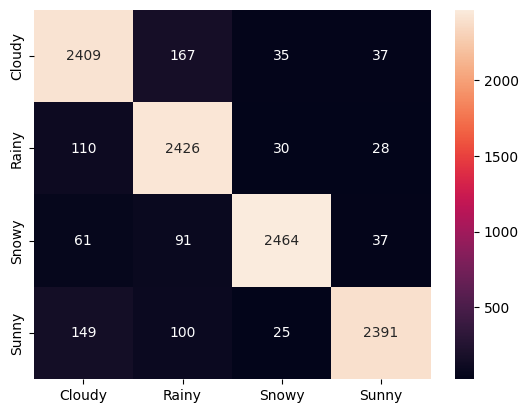

In [83]:
sns.heatmap(cf  ,  annot  = True  , fmt  = 'd' , xticklabels= classes ,  yticklabels= classes)

In [ ]:
# testing


In [84]:
y_test_act  = []
for  i in range((y_test.shape[0])):
  out =  np.argmax(y_test.iloc[i , :])
  y_test_act.append(classes[out])


In [85]:
test_pred  =  nn.predict(x_test)
test_pred

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


array([[1.0459613e-08, 4.1931366e-06, 9.9999571e-01, 4.5279634e-08],
       [2.2083781e-05, 9.1645745e-07, 4.0331276e-08, 9.9997687e-01],
       [6.3366765e-01, 2.8738713e-01, 6.1448599e-04, 7.8330718e-02],
       ...,
       [8.4006612e-04, 4.2006170e-05, 2.5709625e-04, 9.9886084e-01],
       [9.9954218e-01, 2.6846654e-04, 2.0455935e-05, 1.6888608e-04],
       [7.1968507e-09, 1.3542116e-10, 5.6419811e-09, 1.0000000e+00]],
      dtype=float32)

In [86]:
y_test_pred  = []
for  i in test_pred:
  out =  np.argmax(i)
  y_test_pred.append(classes[out])

In [87]:
print(classification_report(y_test_act  , y_test_pred))

              precision    recall  f1-score   support

      Cloudy       0.86      0.89      0.88       652
       Rainy       0.85      0.92      0.88       706
       Snowy       0.96      0.90      0.93       647
       Sunny       0.94      0.89      0.91       635

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



In [88]:
cfm  =  confusion_matrix(y_test_act  ,  y_test_pred)

In [89]:
cfm

array([[581,  54,   5,  12],
       [ 36, 646,  13,  11],
       [ 25,  26, 583,  13],
       [ 30,  37,   5, 563]])

<Axes: >

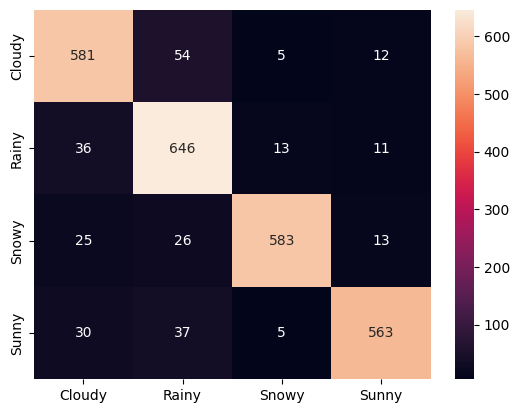

In [90]:
sns.heatmap(cfm  , fmt  = 'd' , annot  = True  ,  xticklabels= classes  ,  yticklabels=classes)

## work with unseen data


In [91]:
sample  =  pd.read_csv('test_weather.csv')

In [92]:
sample.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location'],
      dtype='object')

In [94]:
sample.rename(columns = {'Precipitation (%)' : 'Precipitation' , 'Visibility (km)':'Visibility'} , inplace=  True)

In [95]:
sample.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover',
       'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility', 'Location'],
      dtype='object')

In [96]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Atmospheric Pressure', 'UV Index', 'Visibility'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Cloud Cover', 'Season', 'Location'], dtype='object'))])

In [99]:
sample_scaled = pre.fit_transform(sample)

In [100]:
sample_scaled =  pd.DataFrame(sample_scaled  ,  columns  =  pre.get_feature_names_out())

In [101]:
sample_scaled.head(2)

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation,num__Atmospheric Pressure,num__UV Index,num__Visibility,cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
0,-0.969243,-0.135952,0.451064,0.250973,-0.399453,-0.987235,-1.023246,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,4.722797,1.679842,0.339137,0.787679,0.404621,1.863051,0.605393,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [102]:
pred  =  nn.predict(sample_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 484ms/step


In [103]:
pred

array([[3.85964825e-07, 1.08024797e-04, 9.99890685e-01, 9.23186121e-07],
       [2.42928579e-01, 1.03088189e-02, 1.98985124e-03, 7.44772732e-01],
       [9.96130824e-01, 5.60608227e-04, 4.00844110e-05, 3.26847262e-03],
       [2.05988716e-02, 9.78791237e-01, 3.21454601e-04, 2.88446405e-04],
       [4.24934842e-04, 6.63200944e-06, 4.37772360e-05, 9.99524534e-01],
       [9.95312810e-01, 4.24398948e-03, 2.08982910e-05, 4.22318815e-04],
       [9.73293481e-06, 3.81141232e-04, 9.99608278e-01, 7.98075860e-07],
       [1.56695241e-05, 1.14056129e-04, 9.99868751e-01, 1.59847275e-06],
       [1.51857807e-06, 1.03331833e-04, 9.99893665e-01, 1.39205258e-06],
       [5.53230941e-01, 4.50549647e-02, 9.12570767e-03, 3.92588347e-01],
       [1.11108776e-02, 9.87846494e-01, 2.56258412e-04, 7.86283403e-04],
       [6.68868516e-03, 9.93234336e-01, 3.73297080e-05, 3.96344731e-05],
       [5.10196898e-08, 4.82848691e-07, 9.99999523e-01, 1.94906544e-08],
       [9.98932183e-01, 8.25525422e-06, 1.73269655e

In [104]:
y_pred  = []
for  i in pred:
  out =  np.argmax(i)
  y_pred.append(classes[out])

In [105]:
y_pred

['Snowy',
 'Sunny',
 'Cloudy',
 'Rainy',
 'Sunny',
 'Cloudy',
 'Snowy',
 'Snowy',
 'Snowy',
 'Cloudy',
 'Rainy',
 'Rainy',
 'Snowy',
 'Cloudy',
 'Sunny',
 'Snowy',
 'Cloudy',
 'Sunny',
 'Rainy',
 'Snowy',
 'Rainy',
 'Rainy',
 'Cloudy',
 'Rainy',
 'Rainy',
 'Snowy',
 'Cloudy',
 'Cloudy',
 'Rainy',
 'Snowy',
 'Sunny',
 'Cloudy',
 'Snowy',
 'Rainy',
 'Rainy',
 'Cloudy',
 'Rainy',
 'Cloudy',
 'Rainy',
 'Cloudy',
 'Snowy',
 'Rainy',
 'Snowy',
 'Snowy',
 'Cloudy',
 'Rainy',
 'Snowy',
 'Cloudy',
 'Snowy',
 'Sunny',
 'Sunny',
 'Cloudy',
 'Rainy',
 'Rainy',
 'Sunny',
 'Cloudy',
 'Sunny',
 'Rainy',
 'Rainy',
 'Rainy',
 'Sunny',
 'Snowy',
 'Sunny',
 'Rainy',
 'Snowy',
 'Sunny',
 'Snowy',
 'Cloudy',
 'Rainy',
 'Snowy',
 'Rainy',
 'Rainy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Rainy',
 'Rainy',
 'Cloudy',
 'Cloudy',
 'Sunny',
 'Snowy',
 'Rainy',
 'Rainy',
 'Snowy',
 'Snowy',
 'Sunny',
 'Cloudy',
 'Cloudy',
 'Snowy',
 'Sunny',
 'Sunny',
 'Snowy',
 'Snowy',
 'Sunny',
 'Cloudy',
 'Rainy',
 'Sn